## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[114.25 105.25 108.25]
   [113.75 104.75 107.75]
   [119.25 110.25 113.25]
   ...
   [106.25  96.25  95.25]
   [105.    95.    94.  ]
   [ 91.75  81.75  80.75]]

  [[123.25 114.25 117.25]
   [125.   116.   119.  ]
   [111.5  102.5  105.5 ]
   ...
   [107.25  97.25  96.25]
   [104.5   94.5   93.5 ]
   [115.75 105.75 104.75]]

  [[110.25 101.25 104.25]
   [106.    97.   100.  ]
   [113.25 104.25 107.25]
   ...
   [118.25 108.25 107.25]
   [112.75 102.75 101.75]
   [ 96.5   86.5   85.5 ]]

  ...

  [[155.5  149.5  153.5 ]
   [161.25 155.25 159.25]
   [153.5  147.5  151.5 ]
   ...
   [163.5  157.5  159.5 ]
   [161.   155.   157.  ]
   [160.75 154.75 156.75]]

  [[144.25 138.25 142.25]
   [156.5  150.5  154.5 ]
   [158.5  152.5  156.5 ]
   ...
   [163.75 157.75 159.75]
   [162.75 156.75 158.75]
   [160.25 154.25 156.25]]

  [[153.   147.   151.  ]
   [150.25 144.25 148.25]
   [152.   146.   150.  ]
   ...
   [159.   153.   155.  ]
   [167.   161.   163.  ]
   [167.25 161.25 16

## Building Model

In [6]:
model = Sequential()

### Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [17]:
        import os
        os.environ["TF_USE_LEGACY_KERAS"] = "True"
        import tensorflow as tf
        # Now tf.keras will use Keras 2 optimizers

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7166s 3s/step - accuracy: 0.4838 - loss: 1.7318 - val_accuracy: 0.7019 - val_loss: 0.9276
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8576s 4s/step - accuracy: 0.7874 - loss: 0.6526 - val_accuracy: 0.8390 - val_loss: 0.4902
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6219s 3s/step - accuracy: 0.8546 - loss: 0.4442 - val_accuracy: 0.8334 - val_loss: 0.5179
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8830s 4s/step - accuracy: 0.8801 - loss: 0.3622 - val_accuracy: 0.8628 - val_loss: 0.4243
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 19640s 9s/step - accuracy: 0.8970 - loss: 0.3082 - val_accuracy: 0.8768 - val_loss: 0.3775


In [22]:
#Model Evaluation on Training set
import keras
from keras import optimizers

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1883s 857ms/step - accuracy: 0.9122 - loss: 0.2632


In [41]:
print(train_loss,train_acc)

0.26317715644836426 0.9122412800788879


In [42]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 447s 812ms/step - accuracy: 0.8768 - loss: 0.3775


In [51]:
print(val_loss,val_acc)

0.37753939628601074 0.8767926096916199


In [52]:
model.save("trained_model.keras")

In [53]:
training_history.history

{'accuracy': [0.48378974199295044,
  0.7873675227165222,
  0.8545700311660767,
  0.8801195025444031,
  0.8970481753349304],
 'loss': [1.7317864894866943,
  0.652554452419281,
  0.4442148506641388,
  0.3622394800186157,
  0.30819258093833923],
 'val_accuracy': [0.7018552422523499,
  0.8390052318572998,
  0.8333712816238403,
  0.8627930879592896,
  0.8767926096916199],
 'val_loss': [0.9276253581047058,
  0.49023571610450745,
  0.5179457664489746,
  0.4242648482322693,
  0.3775392174720764]}

In [54]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [55]:
training_history.history['val_accuracy']

[0.7018552422523499,
 0.8390052318572998,
 0.8333712816238403,
 0.8627930879592896,
 0.8767926096916199]

### Accuracy Visualization

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

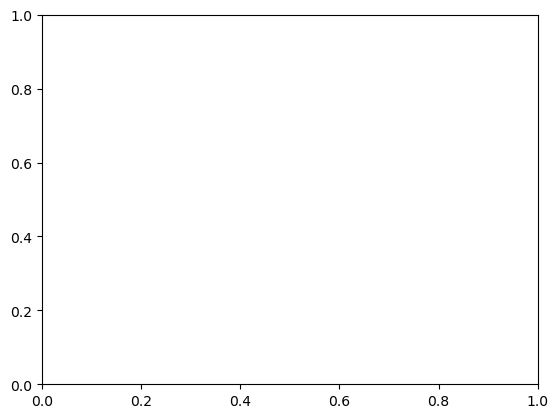

In [56]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation


In [57]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [68]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [69]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 447s 813ms/step


(array([[9.7942936e-01, 1.5835598e-02, 9.1303418e-06, ..., 2.4586952e-11,
         1.2852860e-08, 3.6375774e-08],
        [9.9999726e-01, 1.9610723e-06, 6.9685595e-09, ..., 2.0195675e-12,
         1.5356150e-12, 6.0246712e-12],
        [9.9867046e-01, 2.6624768e-05, 2.3363561e-06, ..., 1.6781078e-15,
         3.3274739e-09, 1.5570999e-06],
        ...,
        [8.5546938e-09, 2.4489790e-17, 2.7110269e-07, ..., 5.4370103e-05,
         1.3662627e-11, 9.9854422e-01],
        [4.8356181e-09, 7.0447705e-19, 4.5726640e-07, ..., 3.4261881e-05,
         2.1068278e-16, 9.9313229e-01],
        [2.4418227e-09, 1.0747995e-10, 9.5838185e-11, ..., 6.4857105e-08,
         2.1231772e-08, 9.9456304e-01]], dtype=float32),
 (17572, 38))

In [70]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [71]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [72]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [73]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [74]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.84      0.88      0.86       504
                                 Apple___Black_rot       0.95      0.95      0.95       497
                          Apple___Cedar_apple_rust       0.93      0.85      0.89       440
                                   Apple___healthy       0.84      0.87      0.85       502
                               Blueberry___healthy       0.94      0.87      0.91       454
          Cherry_(including_sour)___Powdery_mildew       0.89      0.91      0.90       421
                 Cherry_(including_sour)___healthy       0.96      0.92      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.78      0.91      0.84       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.82      0.

In [75]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[444,   5,   1, ...,   0,   0,   1],
       [  4, 471,   1, ...,   0,   1,   0],
       [  1,   0, 376, ...,   1,   1,   0],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   1, 409,   0],
       [  2,   0,   0, ...,   1,   0, 435]])

In [76]:
### Confusion Matrix Visualization

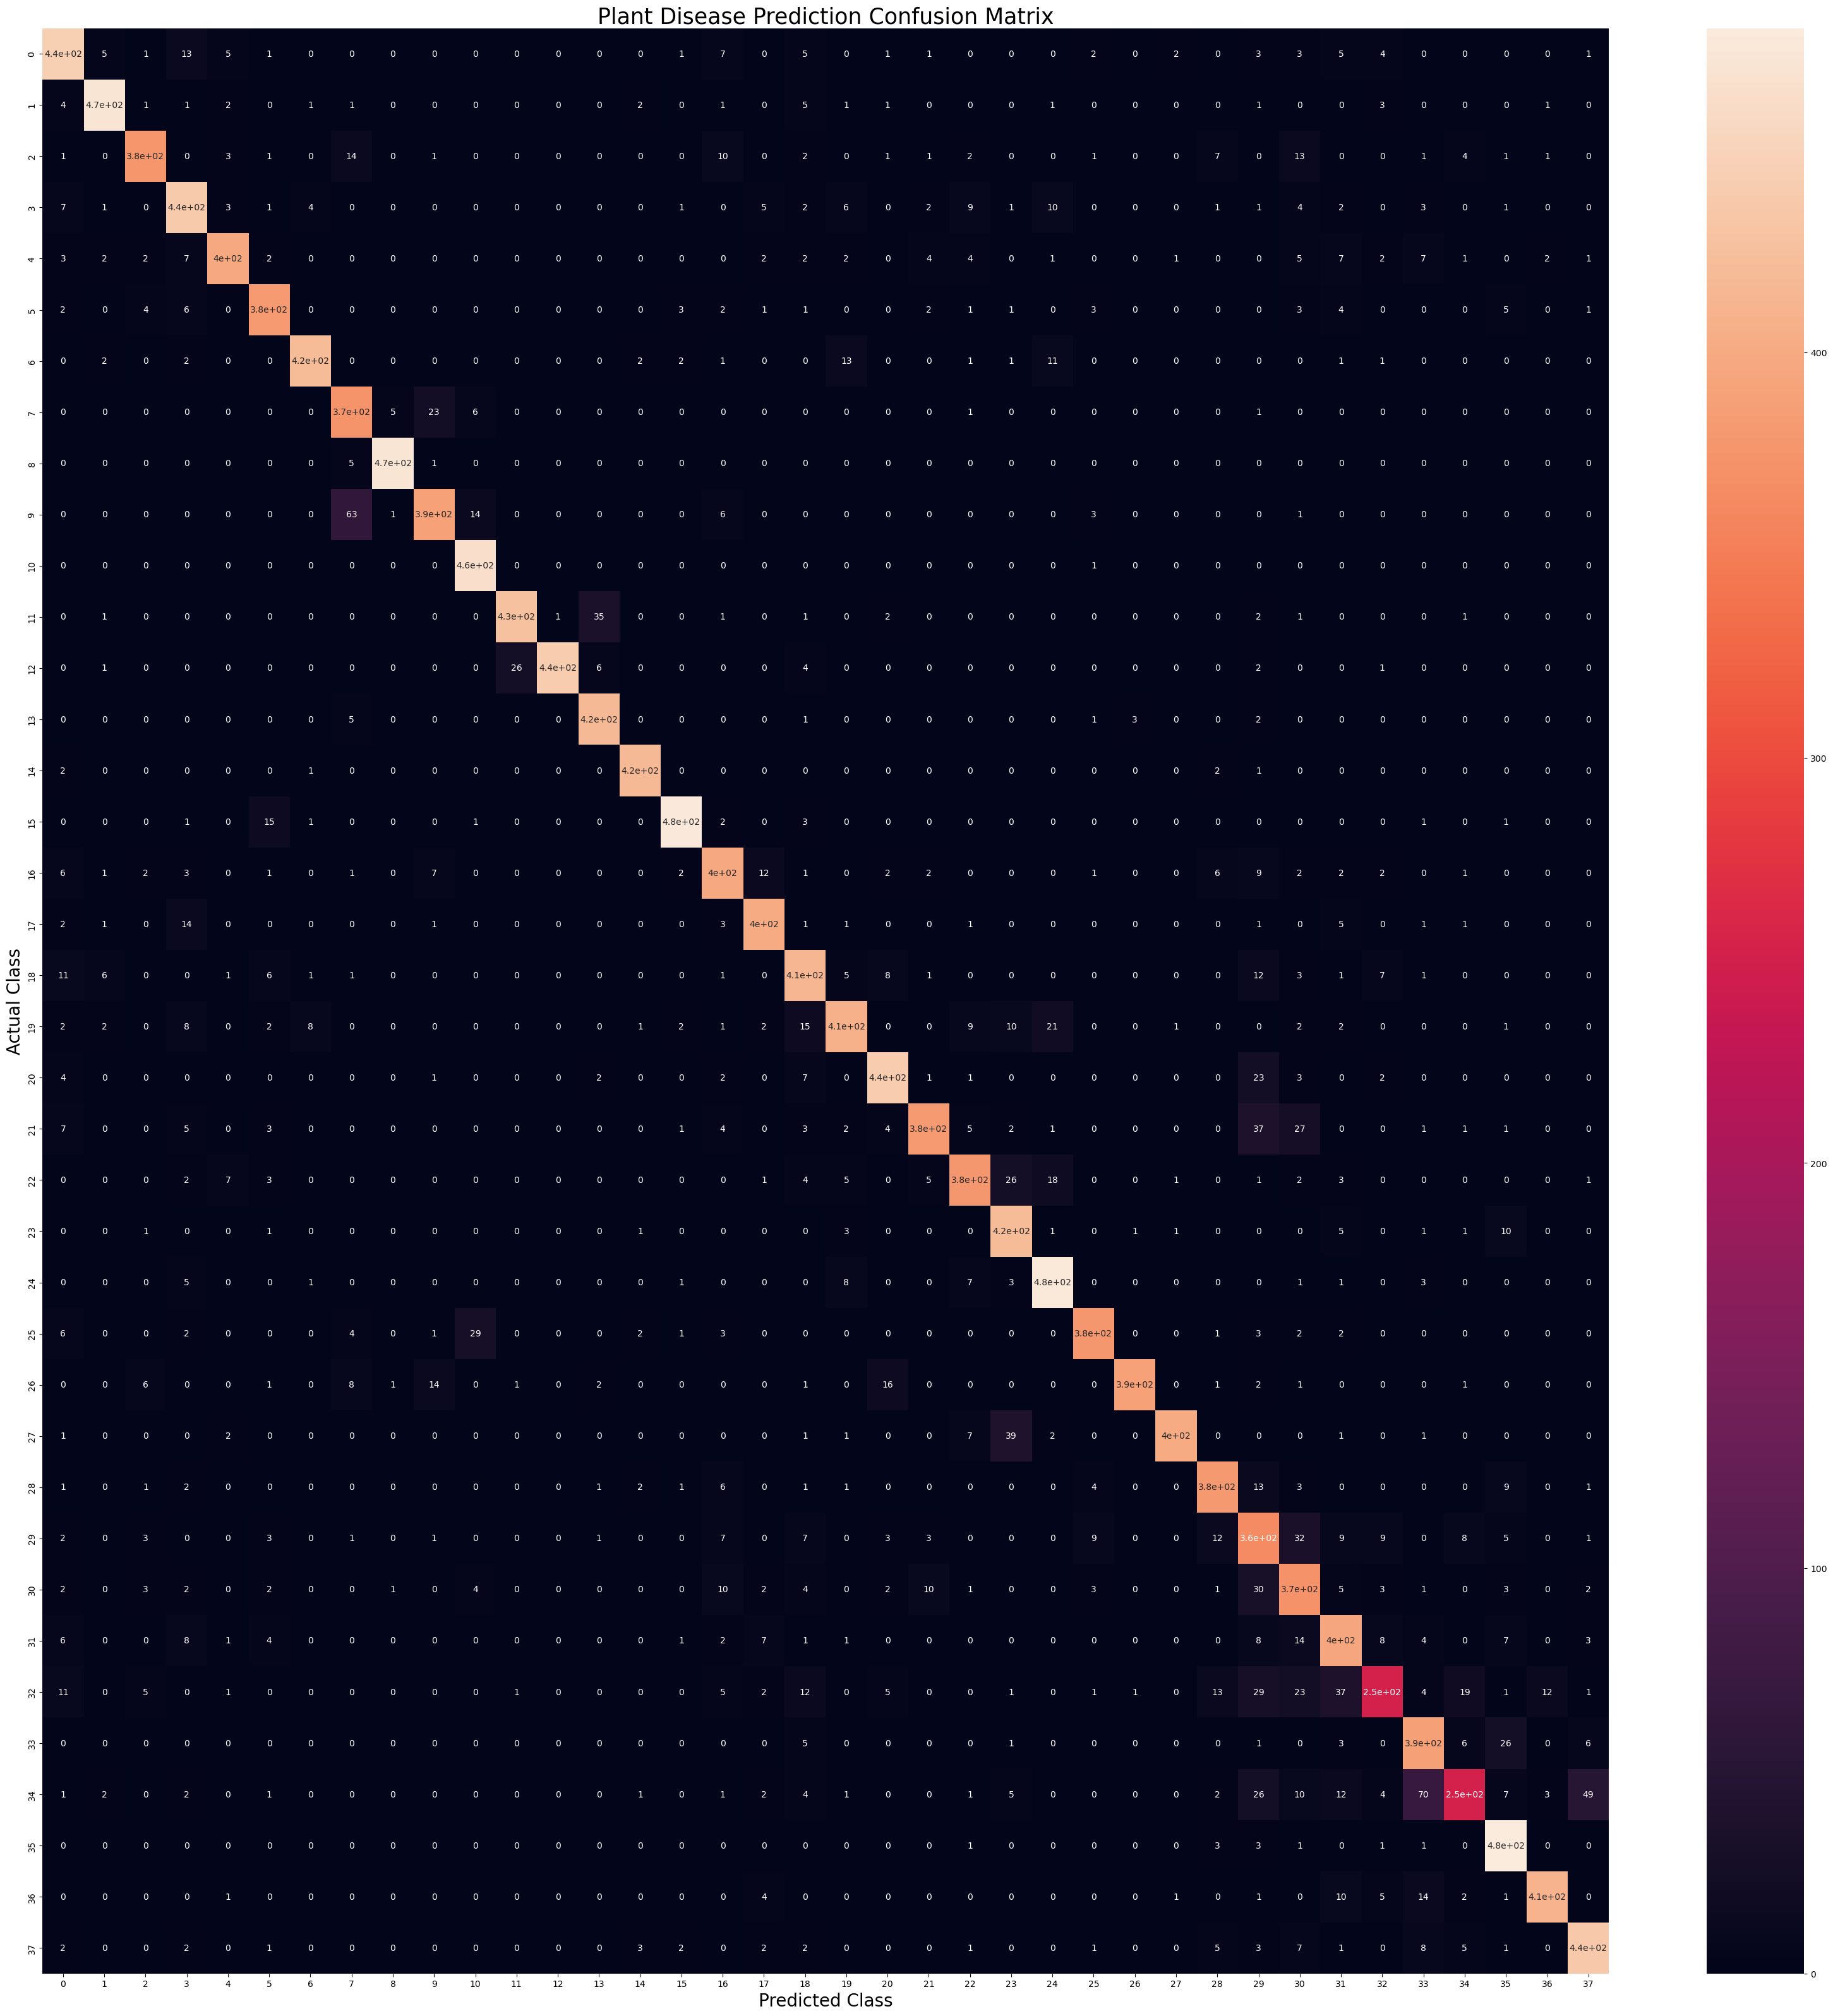

In [77]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()